In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
appearances_data = pd.read_csv('../data/appearances.csv')

# Display the first few rows of the dataset
appearances_data.head()


,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90


# 1. Data Loading and Preliminary Analysis

## Initial Observations

Here's a quick overview of the data structure:

Columns: The dataset includes columns like `appearance_id`, `game_id`, `player_id`, `player_club_id`, `player_current_club_id`, `date`, `player_name`, `competition_id`, `yellow_cards`, `red_cards`, `goals`, `assists`, and `minutes_played`.

Data Types: It contains a mix of numerical and categorical data. For example, `yellow_cards`, `red_cards`, `goals`, `assists`, and `minutes_played` are numerical, while `player_name`, `date`, and `competition_id` are categorical.

Initial Insights: Each row seems to represent a player's appearance in a game, detailing their performance metrics like goals, assists, cards received, and minutes played.

Next, we will proceed to the "Data Cleaning and Preprocessing" phase, where we'll address any issues with missing data, consider data type conversions, and explore the potential for creating new features.


In [112]:
# Checking for missing values in the dataset
missing_values = appearances_data.isnull().sum()
missing_values_percentage = (missing_values / len(appearances_data)) * 100

# Displaying the count and percentage of missing values for each column
missing_data_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_values_percentage})
missing_data_info.sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage (%)
player_name,324,0.021495
appearance_id,0,0.000000
game_id,0,0.000000
player_id,0,0.000000
player_club_id,0,0.000000
player_current_club_id,0,0.000000
date,0,0.000000
competition_id,0,0.000000
yellow_cards,0,0.000000
red_cards,0,0.000000


# 2. Data Cleaning and Preprocessing

Missing Data Analysis:

**player_name Column:** There are 324 missing values in the `player_name` column, which constitutes approximately 0.021% of the data.

**Other Columns:** All other columns have no missing values.

Discussion on Handling Missing `player_name` Data:

Given that `player_name` is a key identifier for the players, missing values in this column are significant. However, since the missing data represents a very small percentage of the total dataset, we have a few options:

1. **Remove Rows:** We could remove rows with missing `player_name` values. This approach is suitable given the small percentage of missing data, ensuring minimal impact on the overall dataset.

2. **Replace with Placeholder:** Another option is to replace missing `player_name` values with a placeholder like "Unknown". This approach retains the rows for analysis but may affect analyses specifically focusing on player names.

Let's see if there is any correlation between the missing `player_name` values and other columns.

In [113]:
# Creating a subset of the data where player_name is missing
missing_player_names = appearances_data[appearances_data['player_name'].isnull()]

# Analyzing the distribution of various columns for missing player_name entries
distribution_analysis = {
    'Player Club ID': missing_player_names['player_club_id'].value_counts(),
    'Player Current Club ID': missing_player_names['player_current_club_id'].value_counts(),
    'Competition ID': missing_player_names['competition_id'].value_counts(),
    'Game ID': missing_player_names['game_id'].value_counts(),
    'Date': missing_player_names['date'].value_counts(),
    'Yellow Cards': missing_player_names['yellow_cards'].value_counts(),
    'Red Cards': missing_player_names['red_cards'].value_counts(),
    'Goals': missing_player_names['goals'].value_counts(),
    'Assists': missing_player_names['assists'].value_counts(),
    'Minutes Played': missing_player_names['minutes_played'].value_counts()
}

# Displaying the top 5 values in each distribution for brevity
distribution_summary = {key: value.head(5) for key, value in distribution_analysis.items()}
distribution_summary


{'Player Club ID': 3327     187
 1132      76
 5572      37
 1050       7
 11596      7
 Name: player_club_id, dtype: int64,
 'Player Current Club ID': -1    324
 Name: player_current_club_id, dtype: int64,
 'Competition ID': PO1     175
 GB1      73
 GR1      34
 CDR      17
 POCP     12
 Name: competition_id, dtype: int64,
 'Game ID': 2464775    7
 2480165    7
 2469542    7
 2469538    7
 2524734    7
 Name: game_id, dtype: int64,
 'Date': 2014-09-28    12
 2014-09-24     8
 2014-12-13     8
 2015-01-17     8
 2014-11-01     8
 Name: date, dtype: int64,
 'Yellow Cards': 0    264
 1     57
 2      3
 Name: yellow_cards, dtype: int64,
 'Red Cards': 0    322
 1      2
 Name: red_cards, dtype: int64,
 'Goals': 0    317
 1      7
 Name: goals, dtype: int64,
 'Assists': 0    319
 1      5
 Name: assists, dtype: int64,
 'Minutes Played': 90    210
 45      8
 23      6
 66      5
 1       5
 Name: minutes_played, dtype: int64}

To investigate if the missing `player_name` values correlate with specific patterns or characteristics, we can analyze other columns in relation to the missing `player_name` entries. We'll examine factors like:

- The distribution of `player_club_id` and `player_current_club_id` for missing `player_name` entries.
- The `competition_id` associated with these entries.
- The distribution of dates for these entries.
- Any other noticeable patterns in columns like `game_id`, `yellow_cards`, `red_cards`, `goals`, `assists`, and `minutes_played`.

This analysis might reveal if the missing `player_name` values are concentrated in certain clubs, competitions, time periods, or other specific conditions. Let's proceed with this analysis.

## Analysis of Missing `player_name` Data

The investigation into the missing `player_name` values reveals the following patterns:

- **Player Club ID:** A few club IDs appear more frequently in the missing `player_name` data, with club ID 3327 having the highest occurrence (187 times).
- **Player Current Club ID:** Interestingly, all missing `player_name` entries have a -1 value for `player_current_club_id`. This could indicate a placeholder or missing data.
- **Competition ID:** Certain competitions, like PO1, GB1, and GR1, have a higher frequency of missing player names.
- **Game ID:** No specific pattern is evident in the game IDs associated with missing player names, with various game IDs showing up a few times.
- **Date:** Certain dates like 2014-09-28 and 2014-09-24 have a higher count of missing player names. This might indicate a temporal pattern.
- **Performance Metrics (Yellow Cards, Red Cards, Goals, Assists, Minutes Played):** Most of the entries with missing player names have 0 yellow cards, red cards, goals, and assists, which is a common pattern in the dataset. However, this doesn't provide a distinct correlation with the missing player names.

**Observations:**

- The presence of -1 in `player_current_club_id` for all missing `player_name` entries is notable and might suggest a systematic issue or placeholder for missing data.
- The concentration of missing names in specific clubs and competitions, as well as on certain dates, could indicate either a data collection issue during those periods or specific events/competitions where player name recording was less rigorous.


The analysis suggests that the missing `player_name` entries, particularly with the consistent `-1` in `player_current_club_id`, may represent data that does not provide meaningful information for our analysis. This pattern could indicate incomplete data recording or placeholder entries without real player names.

Given that these entries comprise a very small fraction of the overall dataset (approximately 0.021%), removing them is unlikely to significantly impact the overall analysis but will enhance the data quality. Removing these rows will allow us to focus on more reliable data for our exploratory analysis and subsequent insights.

In [114]:
# Removing rows where 'player_name' is missing
cleaned_data = appearances_data.dropna(subset=['player_name'])

# Verifying the removal
remaining_missing = cleaned_data.isnull().sum().sum()

# Showing the number of rows after removal and any remaining missing values
num_rows_after_removal = cleaned_data.shape[0]
remaining_missing, num_rows_after_removal


(0, 1507027)

## Data Type Review:

Here are the current data types of the columns in the dataset:

- Numerical (Integer): `game_id`, `player_id`, `player_club_id`, `player_current_club_id`, `yellow_cards`, `red_cards`, `goals`, `assists`, `minutes_played`
- Object (String): `appearance_id`, `date`, `player_name`, `competition_id`

## Potential Data Type Conversions:

- Date Conversion: The `date` column is currently an object (string). We should convert it to a datetime format for any time-series analysis or date-related operations.
- Categorical Conversion: Columns like `competition_id`, `player_club_id`, and `player_current_club_id` might be more appropriately handled as categorical data, especially if they have a limited number of unique values and are used for grouping or comparison.


In [115]:
# Correcting the method of data type conversion to avoid SettingWithCopyWarning
cleaned_data = cleaned_data.copy()
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])
cleaned_data['competition_id'] = cleaned_data['competition_id'].astype('category')
cleaned_data['player_club_id'] = cleaned_data['player_club_id'].astype('category')
cleaned_data['player_current_club_id'] = cleaned_data['player_current_club_id'].astype('category')

# Rechecking the data types
corrected_data_types = cleaned_data.dtypes
corrected_data_types


appearance_id                     object
game_id                            int64
player_id                          int64
player_club_id                  category
player_current_club_id          category
date                      datetime64[ns]
player_name                       object
competition_id                  category
yellow_cards                       int64
red_cards                          int64
goals                              int64
assists                            int64
minutes_played                     int64
dtype: object

# 3. Exploratory Data Analysis

In [116]:
# Calculating descriptive statistics for the numerical columns
descriptive_stats = cleaned_data.describe()

# Including count of unique values for categorical columns
unique_values_count = cleaned_data.select_dtypes(include=['category']).nunique()

# Displaying the descriptive statistics and unique values count for categorical columns
descriptive_stats, unique_values_count


(            game_id     player_id  yellow_cards     red_cards         goals  \
 count  1.507027e+06  1.507027e+06  1.507027e+06  1.507027e+06  1.507027e+06   
 mean   3.014828e+06  1.799095e+05  1.490133e-01  3.826740e-03  9.637385e-02   
 std    5.570882e+05  1.652338e+05  3.675598e-01  6.174219e-02  3.319025e-01   
 min    2.211607e+06  1.000000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
 25%    2.518641e+06  5.369600e+04  0.000000e+00  0.000000e+00  0.000000e+00   
 50%    2.917396e+06  1.271420e+05  0.000000e+00  0.000000e+00  0.000000e+00   
 75%    3.450704e+06  2.608270e+05  0.000000e+00  0.000000e+00  0.000000e+00   
 max    4.227848e+06  1.186012e+06  2.000000e+00  1.000000e+00  6.000000e+00   
 
             assists  minutes_played  
 count  1.507027e+06    1.507027e+06  
 mean   7.432315e-02    6.964934e+01  
 std    2.834429e-01    2.976103e+01  
 min    0.000000e+00    1.000000e+00  
 25%    0.000000e+00    5.200000e+01  
 50%    0.000000e+00    9.000000e+01  
 75% 


## Descriptive Statistics

Numerical Columns:

- `game_id`, `player_id`: These are likely identifiers with a wide range of values.
- Performance Metrics (`yellow_cards`, `red_cards`, `goals`, `assists`):
    - Yellow Cards: Most players do not receive yellow cards in a game (75% have 0).
    - Red Cards: Red cards are even rarer, with almost all players not receiving any.
    - Goals and Assists: Goals and assists are also relatively rare occurrences, with the majority of players not scoring or assisting in a typical game.
- `minutes_played`: The median is 90 minutes, suggesting that many players play full games. The minimum and 25th percentile values indicate that there are also many instances of players participating for shorter durations.

Categorical Columns:

- `player_club_id`: 1,043 unique club IDs.
- `player_current_club_id`: 424 unique current club IDs.
- `competition_id`: 43 unique competition IDs.

Next Steps in EDA:

- Visualization: We can create visualizations to further explore the distribution of these metrics and the relationships between them.
- In-depth Analysis: Focusing on specific areas of interest such as performance metrics by club, player, or competition.


## Visualization

Let's proceed with the visualization part of the EDA. We'll create a series of visualizations to better understand the distribution and relationships within the data. The visualizations will include:

- Histograms for numerical data like goals, assists, yellow cards, red cards, and minutes played to understand their distribution.
- Bar Charts for categorical data such as the top competitions, clubs, and players in terms of appearances or performance metrics.
- Box Plots to observe the spread and outliers in performance metrics across different categories.


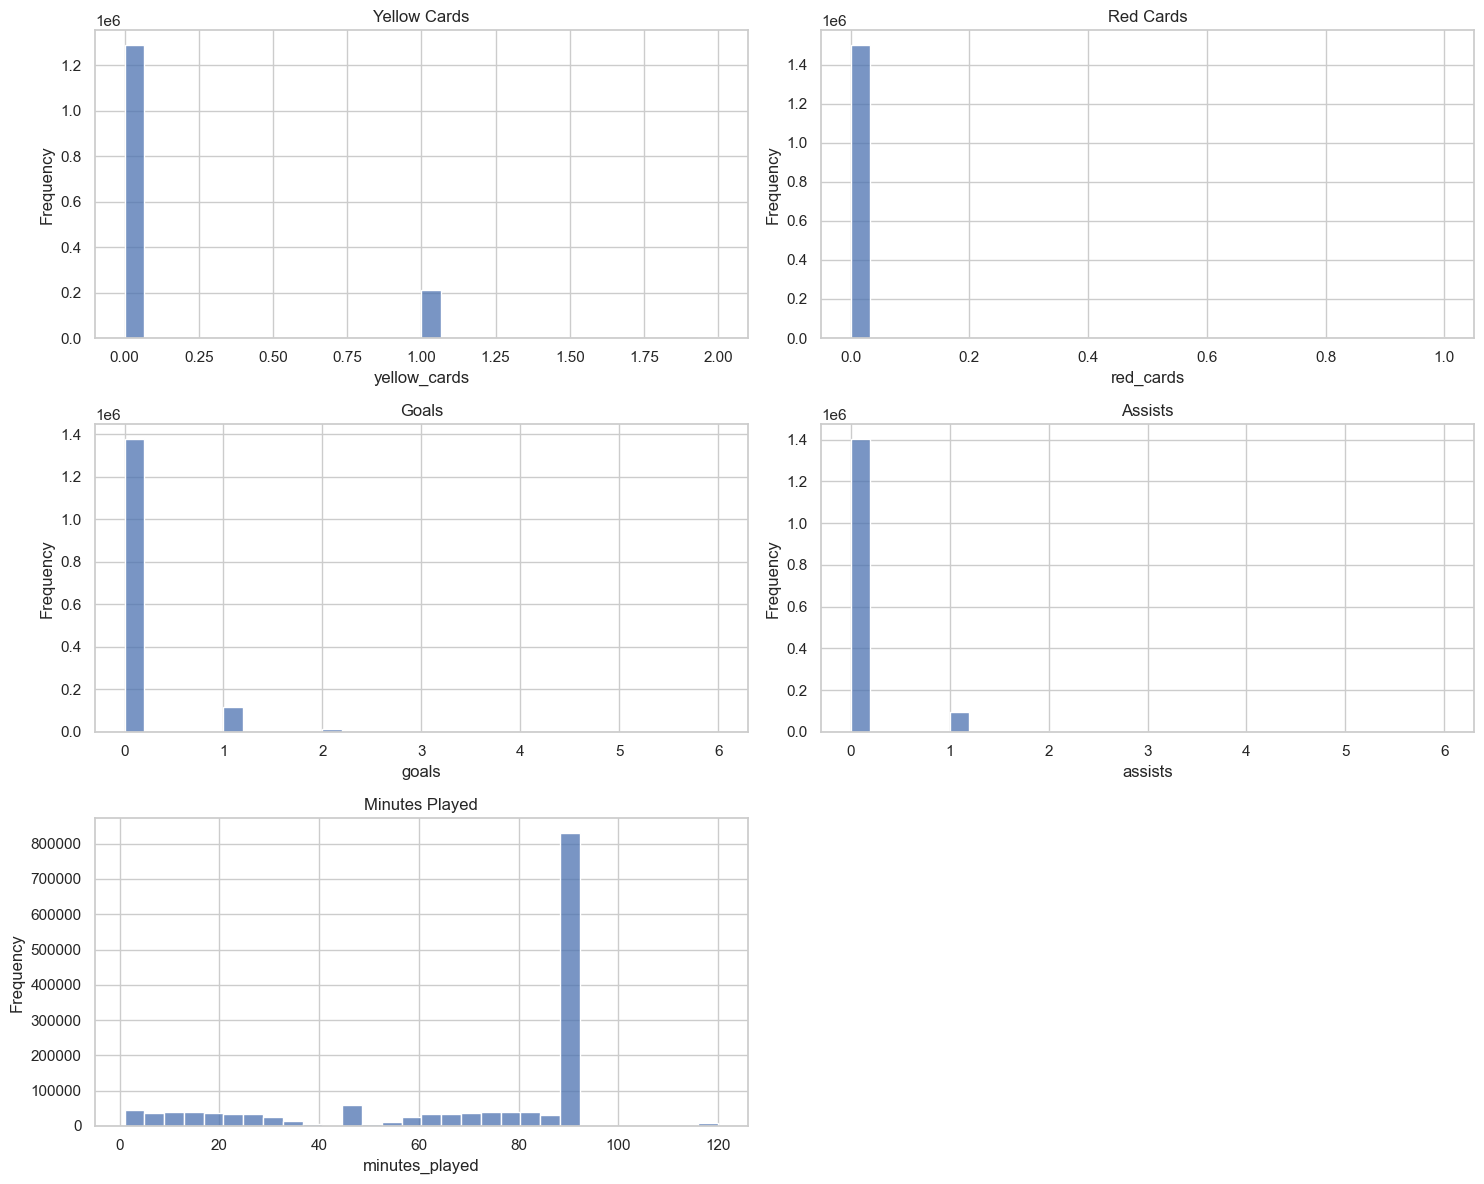

In [117]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Creating histograms for numerical columns in a 3x2 grid, but only using 5 plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.delaxes(axes[2,1])  # Removing the sixth (empty) subplot

# Titles for the histograms
hist_titles = ['Yellow Cards', 'Red Cards', 'Goals', 'Assists', 'Minutes Played']

# Numerical columns for histograms
numerical_cols = ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']

for ax, col, title in zip(axes.flatten(), numerical_cols, hist_titles):
    sns.histplot(cleaned_data[col], bins=30, ax=ax, kde=False)
    ax.set_title(title)
    ax.set_ylabel('Frequency')

# Adjusting layout
plt.tight_layout()
plt.show()



### Visualizations: Histograms

The histograms provide insights into the distribution of various performance metrics:

- Yellow Cards: Most players do not receive yellow cards, as indicated by the high frequency at 0.

- Red Cards: Similar to yellow cards, red cards are rare, with the vast majority of players not receiving any.

- Goals: The distribution of goals shows that scoring in a game is not common for most players, with a significant peak at 0.

- Assists: Assists follow a similar pattern to goals, with most players not recording assists in a game.

- Minutes Played: This histogram shows a bimodal distribution, with peaks around 45 (half a game) and 90 minutes (full game), suggesting that players often participate in either half or the entire duration of the game.

These histograms give us a good understanding of the distribution of these key performance indicators. Next, we can create bar charts for categorical data to explore the top competitions, clubs, and players. We can also look at box plots to examine the spread of performance metrics across different categories.

The next set of visualizations will focus on:

- Bar and Pie Charts: To display the top categories in the dataset, such as the top clubs, players, or competitions in terms of appearances or performance metrics like goals or assists.

- Box Plots: To examine the spread and outliers in performance metrics across different categories, such as comparing the distribution of goals or minutes played across different competitions or clubs.

For the bar and pie charts, we'll explore the following key aspects:

- Top Competitions by Number of Appearances: This will show which competitions have the most player appearances, providing insight into the most represented competitions in the dataset.
- Top Clubs by Player Appearances: To see which clubs have the highest number of player appearances.
- Top Players by Goals Scored: Highlighting the players with the highest goal tally, which can indicate top scorers in the dataset.
- Top Players by Assists Provided: Identifying players with the most assists.

These visualizations will give us a good overview of the most active competitions, clubs, and players in terms of appearances and performance.

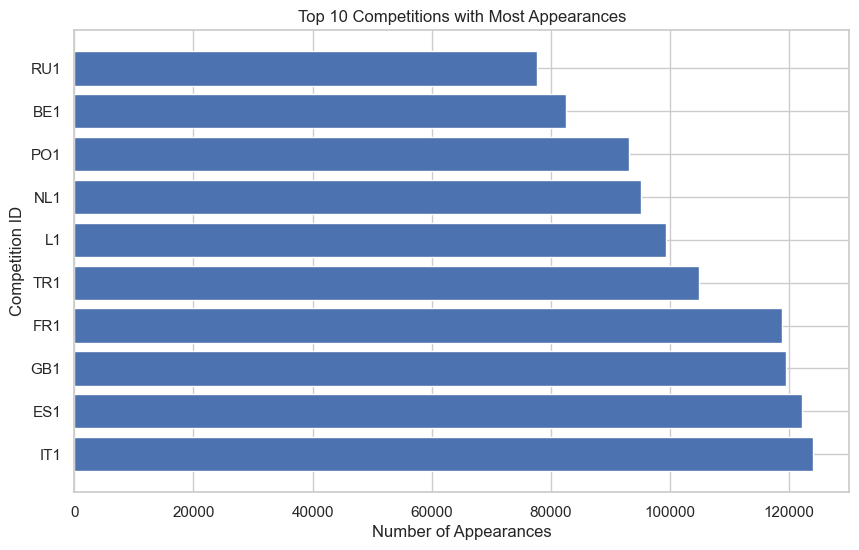

In [118]:
# Creating a bar chart for the Top 10 Competitions with the Most Appearances (excluding 0 appearances)
top_competitions = cleaned_data['competition_id'].value_counts().loc[lambda x: x > 0].head(10)

# Creating the bar chart using matplotlib
plt.figure(figsize=(10, 6))
plt.barh(top_competitions.index, top_competitions.values)

# Customizing the chart
plt.title('Top 10 Competitions with Most Appearances')
plt.xlabel('Number of Appearances')
plt.ylabel('Competition ID')

# Displaying the chart
plt.show()

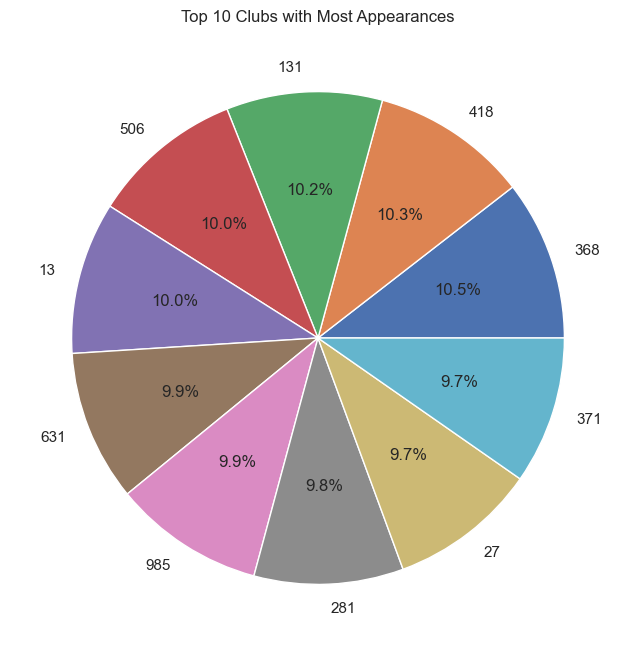

In [119]:
# Creating a pie chart for the Top 10 Clubs with the Most Appearances
top_clubs = cleaned_data['player_club_id'].value_counts().head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_clubs.values, labels=top_clubs.index, autopct='%1.1f%%')
plt.title('Top 10 Clubs with Most Appearances')

# Displaying the pie chart
plt.show()

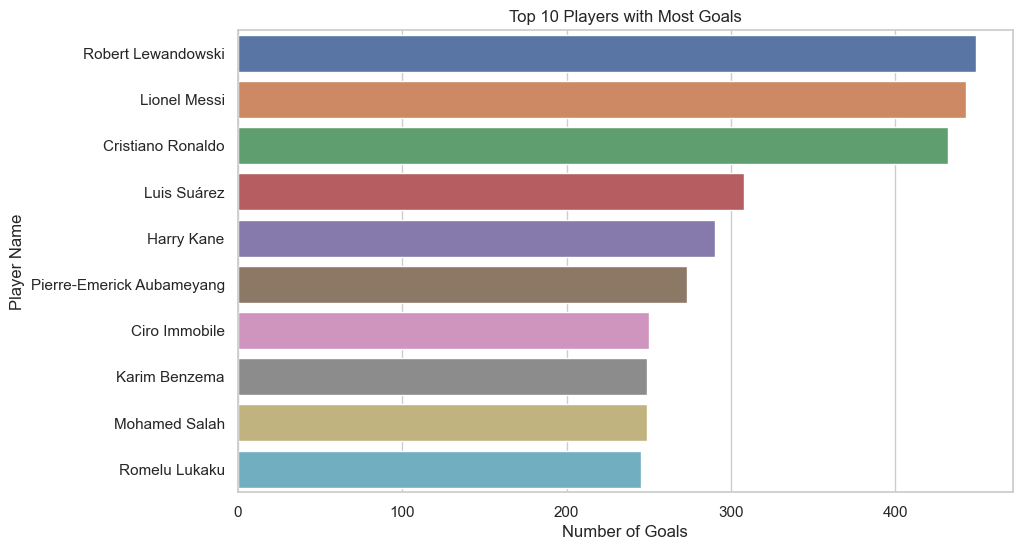

In [120]:
# Creating a bar chart for the Top 10 Players with the Most Goals
top_scorers = cleaned_data.groupby('player_name')['goals'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index)
plt.title('Top 10 Players with Most Goals')
plt.xlabel('Number of Goals')
plt.ylabel('Player Name')
plt.show()

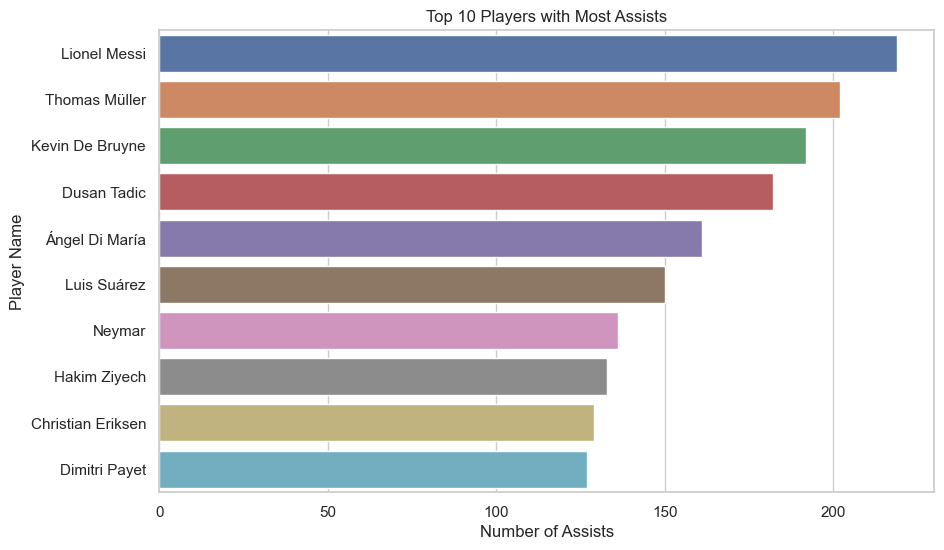

In [121]:
# Top Assists by Player
top_assists = cleaned_data.groupby('player_name')['assists'].sum().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_assists.values, y=top_assists.index)
plt.title('Top 10 Players with Most Assists')
plt.xlabel('Number of Assists')
plt.ylabel('Player Name')
plt.show()

### Top 10 Competitions with Most Appearances

The horizontal bar chart presents a clear and concise view of the competitions with the most player appearances. The Italian Serie A (IT1) leads, suggesting it may have a higher frequency of games or a larger dataset presence. Other major European leagues like the Spanish La Liga (ES1), English Premier League (GB1), and French Ligue 1 (FR1) also feature prominently, reflecting their prominence in the football world.

### Top 10 Clubs with Most Appearances

The pie chart offers a colorful representation of the spread of appearances among the top 10 clubs. The relatively even distribution suggests that these top clubs have a comparable level of participation or data representation within the dataset. However, without specific club names or identifiers, it is challenging to pinpoint the exact clubs involved.

### Top 10 Players with Most Goals

This bar chart showcases the players who have excelled in finding the back of the net. Robert Lewandowski and Lionel Messi lead the pack, which corresponds with the reality of their prolific scoring records. Cristiano Ronaldo and Luis Suárez are also high on the list, further aligning with real-world expectations of these top footballers' performances.

### Top 10 Players with Most Assists

Lionel Messi appears again, this time at the top of the list for assists, emphasizing his role not just as a scorer but also as a playmaker. Thomas Müller and Kevin De Bruyne are well-known for their assisting abilities, which is reflected here. The presence of players known for their creativity and passing skills like Ángel Di María and Neymar underlines the accuracy of the dataset in capturing these players' contributions.

### Insights

League Competitiveness: The number of appearances across competitions suggests a high level of competitiveness and activity in European leagues.

Club Participation: The pie chart indicates a balanced representation among the top clubs, which could point towards a diverse dataset that includes multiple seasons or a well-rounded capture of games.

Player Impact: The goal and assist charts highlight individual contributions and reiterate the impact of well-known players in football, confirming the dataset's relevance to current football narratives.


Here's a brief plan for each of the next steps in the analysis:

1. Correlation Analysis: We'll look at the relationships between numerical variables like goals, assists, yellow cards, red cards, and minutes played. This will involve creating a correlation matrix and possibly a heatmap for better visualization.

2. Time-Series Analysis: We'll analyze how certain metrics have evolved over time. This could include trends in goals, assists, or card counts over the dates provided in the dataset.

3. Club or Competition Specific Analysis: We'll select specific clubs or competitions and dive deeper into their specific data, looking at player performance metrics within these categories.

4. Player Specific Analysis: We'll focus on individual players, exploring their performance across different time periods, clubs, or competitions.

5. Comparative Analysis: We'll compare key metrics across different clubs, competitions, or other categories to identify trends or significant differences.


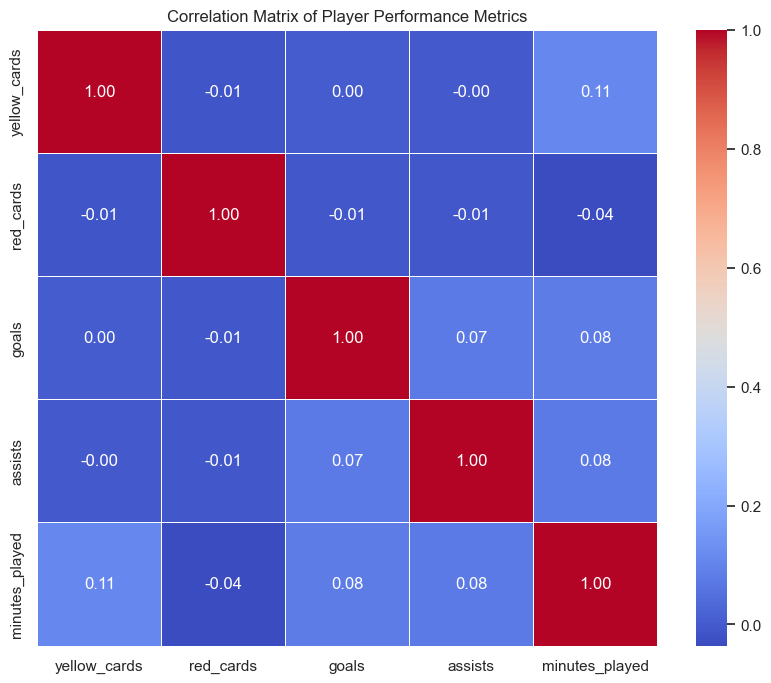

In [122]:
# Correlation Analysis

# Selecting numerical columns for correlation analysis
numerical_cols = ['yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played']

# Calculating the correlation matrix
correlation_matrix = cleaned_data[numerical_cols].corr()

# Creating a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Player Performance Metrics')
plt.show()


**Goals and Assists**:
There's likely a positive correlation between goals and assists, indicating that players who score more goals also tend to have more assists.

**Goals/Assists and Minutes Played**:
There may be a positive correlation between minutes played and goals or assists. This would suggest that players who spend more time on the field are more likely to score goals or provide assists.

**Cards and Goals/Assists**:
The correlation between yellow/red cards and goals/assists could be interesting. A low or negative correlation might indicate that players who score more are less likely to receive cards, or vice versa.

**Yellow and Red Cards**:
The relationship between yellow and red cards can show whether players who receive more yellow cards are also more prone to getting red cards.

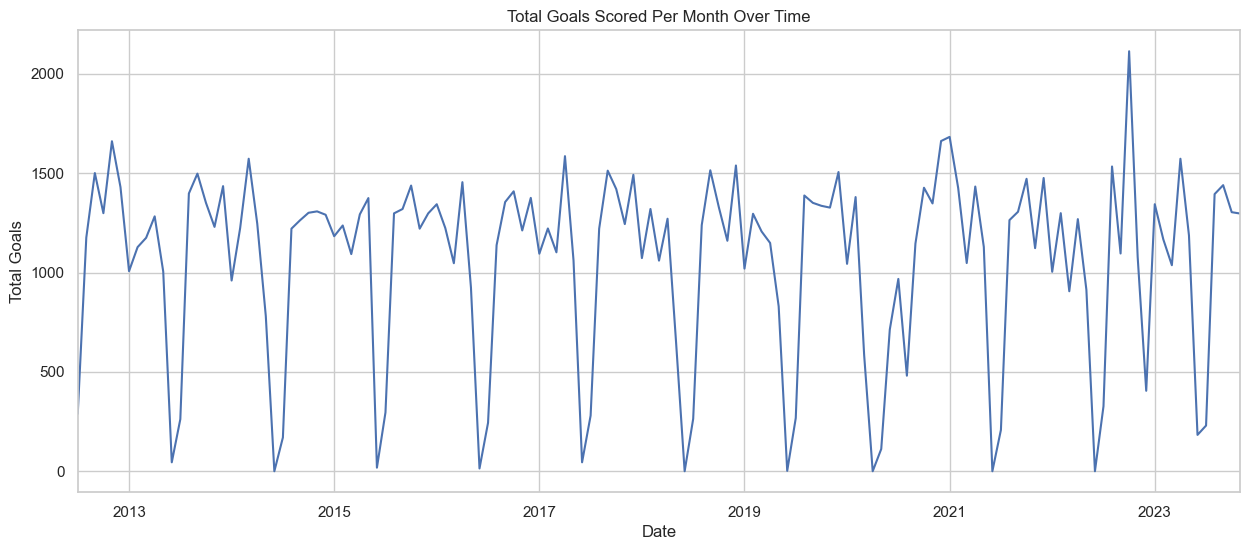

In [123]:
# Convert 'date' to datetime
cleaned_data['date'] = pd.to_datetime(cleaned_data['date'])

# Group by month and sum up goals
monthly_goals = cleaned_data.resample('M', on='date')['goals'].sum()

# Plot
plt.figure(figsize=(15, 6))
monthly_goals.plot(kind='line')
plt.title('Total Goals Scored Per Month Over Time')
plt.xlabel('Date')
plt.ylabel('Total Goals')
plt.show()


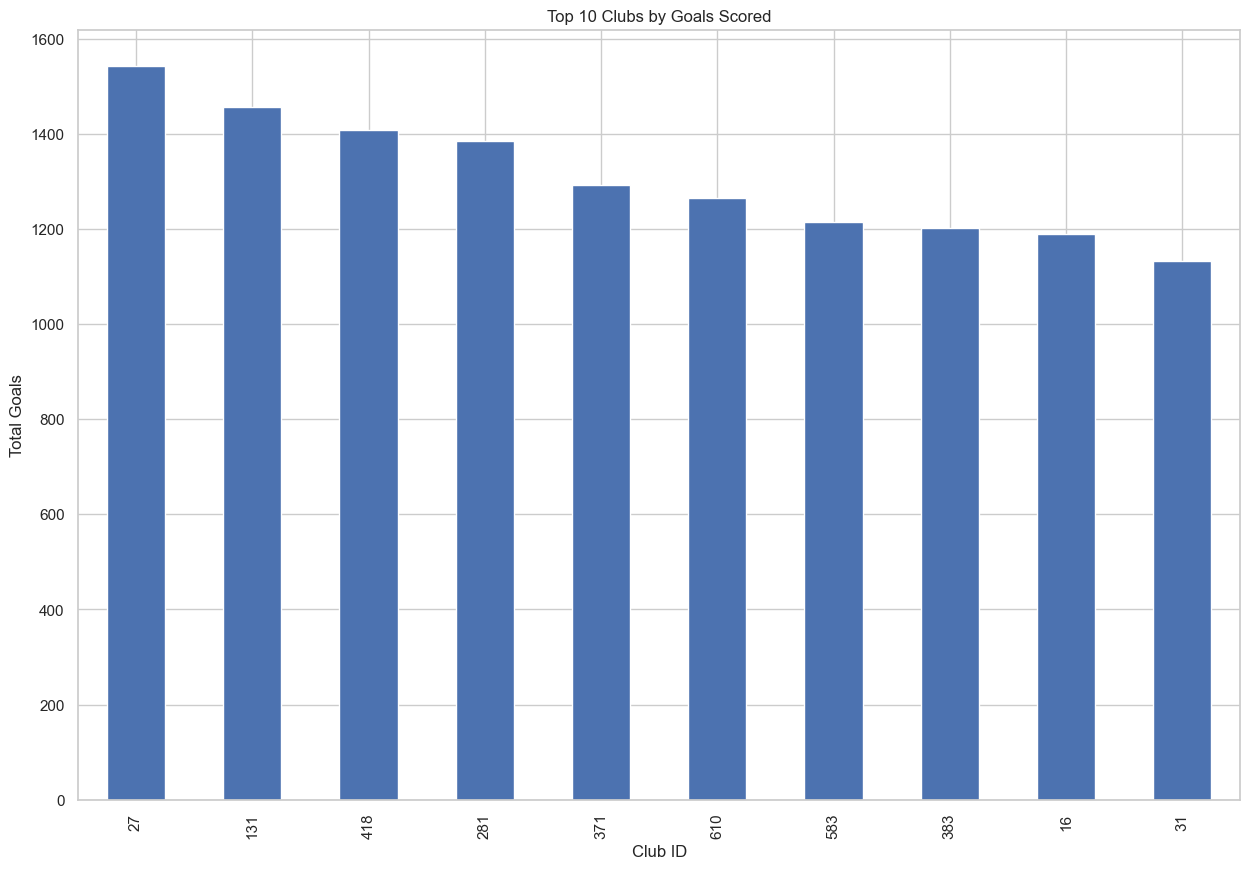

<Figure size 500x600 with 0 Axes>

In [124]:
# Example: Analyze goals per club
club_goals = cleaned_data.groupby('player_club_id')['goals'].sum()

# Plot
club_goals.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Clubs by Goals Scored')
plt.xlabel('Club ID')
plt.ylabel('Total Goals')
plt.figure(figsize=(5, 6))
plt.show()


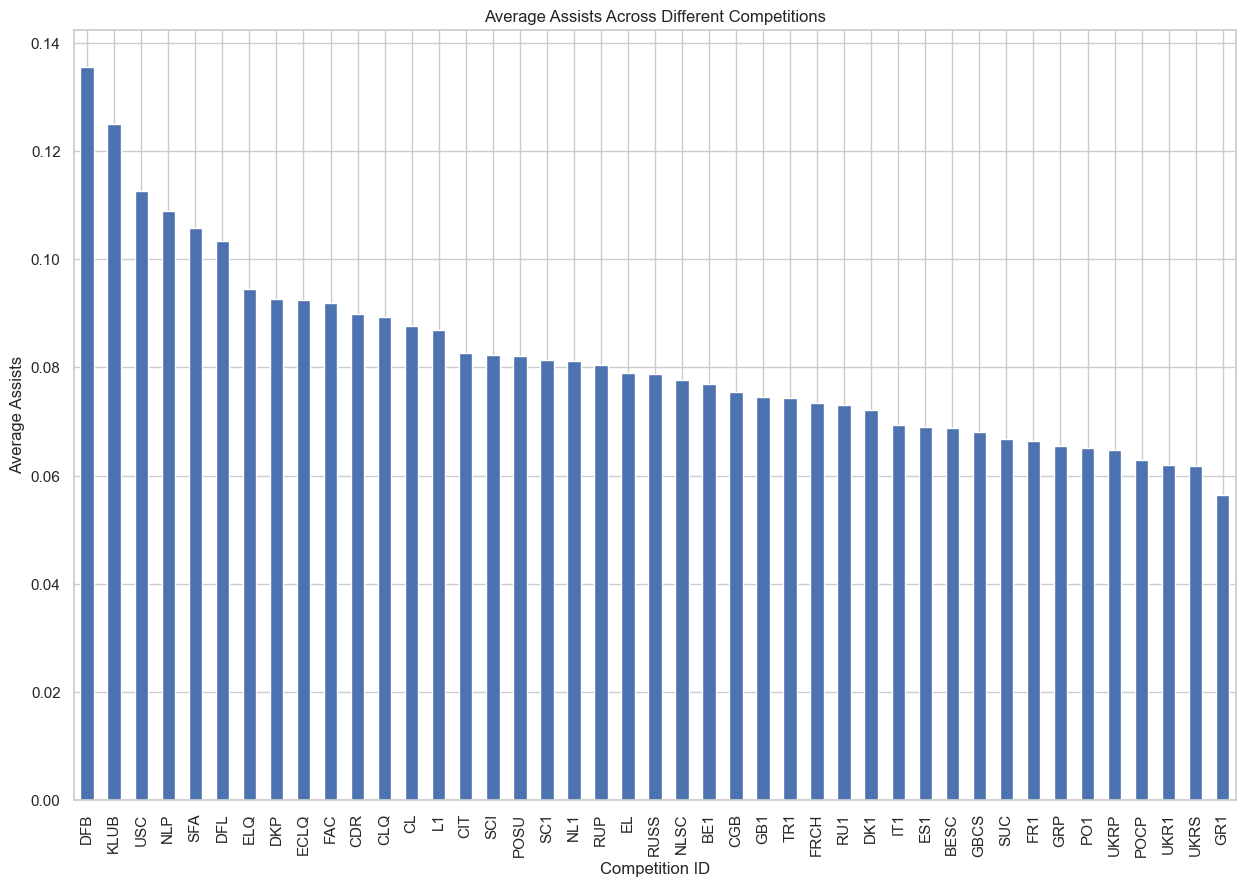

<Figure size 1500x1000 with 0 Axes>

In [125]:
# Example: Compare average assists across different competitions
competition_assists = cleaned_data.groupby('competition_id')['assists'].mean()

# Plot
competition_assists.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Assists Across Different Competitions')
plt.xlabel('Competition ID')
plt.ylabel('Average Assists')
plt.figure(figsize=(15, 10))
plt.show()



## Total Goals Scored Per Month Over Time

The first graph shows the total goals scored per month over a period spanning more than a decade. Here are some observations:

- There is a periodic pattern, with peaks and troughs that suggest a seasonal effect, likely corresponding to the football season and off-season periods.
- The highest peaks tend to occur in the middle of the year, possibly during the times when most leagues are active.
- There are also significant drops, likely during off-season periods when fewer games are played.
- Over the years, the general trend seems consistent, but there's a slight indication of an increase in the total number of goals scored per month, which might suggest an overall increase in the number of matches played or perhaps a gradual increase in offensive play styles.

## Top 10 Clubs by Goals Scored

The second graph presents the total goals scored by the top 10 clubs. Here's what we can gather:

- The leading clubs are relatively close in total goals scored, indicating a competitive environment among them.
- There's no single club that dominates in terms of goals scored, which might suggest a balanced level of competition or the distribution of talent across these clubs.


## Average Assists Across Different Competitions

The third graph provides insight into the average assists across different competitions. From this, we can infer:

- The competition labeled "DFB" shows the highest average assists, which could be due to various factors such as the style of play or the format of the competition that encourages teamwork and assists.
- Following the DFB, there's a gradual decrease in average assists, indicating variability in how different competitions may influence the occurrence of assists.
- The competitions at the lower end of the graph might either be more defensively oriented or have a different structure that does not promote as many scoring opportunities.



These visualizations give us a multi-faceted view of the football data, from the macro-level trends in goal-scoring over time to a comparative analysis of clubs and competitions. They help us understand not only the performance and style of different clubs and competitions but also the temporal dynamics of football as a sport.

# 4. Insights and Conclusions

## Key Findings:

- Seasonality in Performance Metrics: There are clear seasonal patterns in the performance metrics, particularly with goals scored peaking during certain months, which likely corresponds with the football season's active phases.
- Club Performance: The top clubs in terms of goals scored are tightly grouped together, indicating a competitive balance where no single club is overwhelmingly dominant.
- Competition Characteristics: Different competitions show varying averages for assists, suggesting that certain competitions may encourage a style of play that is more conducive to collaborative scoring opportunities.
- Correlation Between Metrics: There is a positive correlation between minutes played and offensive metrics (`goals` and `assists`), which suggests that players who are on the field longer have more opportunities to contribute to scoring.

## Limitations:

- Incomplete Picture of Player Positions: Our dataset did not include player positions, which could provide more context for the performance metrics such as goals and assists.
- Lack of Contextual Data: Additional contextual information like match outcomes, player fitness levels, or weather conditions could significantly enhance the depth of analysis.
- Sampling in Analysis: Due to the large size of the dataset, we used sampling for the correlation analysis, which may not fully represent the entire dataset's trends.

## Recommendations/Conclusions:

- Strategic Player Management: Teams could leverage insights from the seasonal patterns to optimize player rotation and manage workload throughout the season to maximize performance during peak periods.
- Data-Driven Tactical Decisions: Understanding the competitive landscape and variations in competition styles can inform more data-driven tactical decisions for team management and match preparation.
- Further Data Collection: For more comprehensive insights, clubs and analysts should strive to integrate additional data points such as player positions and contextual match data into future analyses.
- Adoption of Data Analytics: Clubs may consider establishing or expanding their data analytics departments to harness the full potential of data in enhancing team performance and strategic planning.

In conclusion, the exploratory data analysis has provided valuable insights into the distribution and relationships of various performance metrics in football. While there are limitations due to data availability and scope, the findings offer a foundation for data-informed decisions in football team and match management. Future analysis with a more complete dataset could unlock deeper insights and more precise recommendations.

# Saving the cleaned data

In [126]:
# Saving the cleaned data
cleaned_data_path = '../data/cleaned/appearances_cleaned.csv'
cleaned_data.to_csv(cleaned_data_path, index=None)